# Review of the paper *Table Detection in Invoice Documents by Graph Neural Networks*

Published at the 2019 International Conference on Document Analysis and Recognition (ICDAR)

Link to the paper:  https://priba.github.io/assets/publi/conf/2019_ICDAR_PRiba.pdf

The goal of this notebook is:
- to give some explanations about the paper
- to explain how this framework could be helpful to extract structured data from invoice
- to show how to use the published [RVL-CDIP Dataset](https://zenodo.org/record/3257319)



## Objective of the paper

The objective of the paper is to **detect tables in unstructured documents**. 


### Motivations:
"Administrative documents are very often semi-structured,
without a fixed layout, but sharing a common set of components (e.g. header, footer, sender, recipient). This spatial
arrangement can be roughly perceived as a tabular layout.
On the other hand, one part of the documents is often a table."

The idea is:
- to be able to benefit from the graphical structure of the document.
- to build a model which could learn what a table is based on graphical information



## Approach

In this work, authors proposed a graph-based approach.


## Contributions of the paper:
1. A GNN model for tabular layout detection in documents 
1. The graph edge information is considered in the node convolutions
1. The proposed languaged model in language independant as very simple text features are used
1. A dataset of 518 invoices images augmented with ground truth for table detection has been open sourced

## Framework
### Graph representation

#### The visibility graph

One first idea is to represent the output of the OCR as a graph $G =(V, E)$, where
- $V$, the vertices, the nodes, are the block of text
- There is an edge between two nodes iff the bounding boxes are vertically or horizontaly visible, i.e. a straight (vertical or honrizontal) can be traced between the bounding boxes without crossing any other


#### An example of an invoice from RVL-CDIP dataset

<img src="grapher_outputs/plots/object_tree_11002591.jpg">

You can try other here:

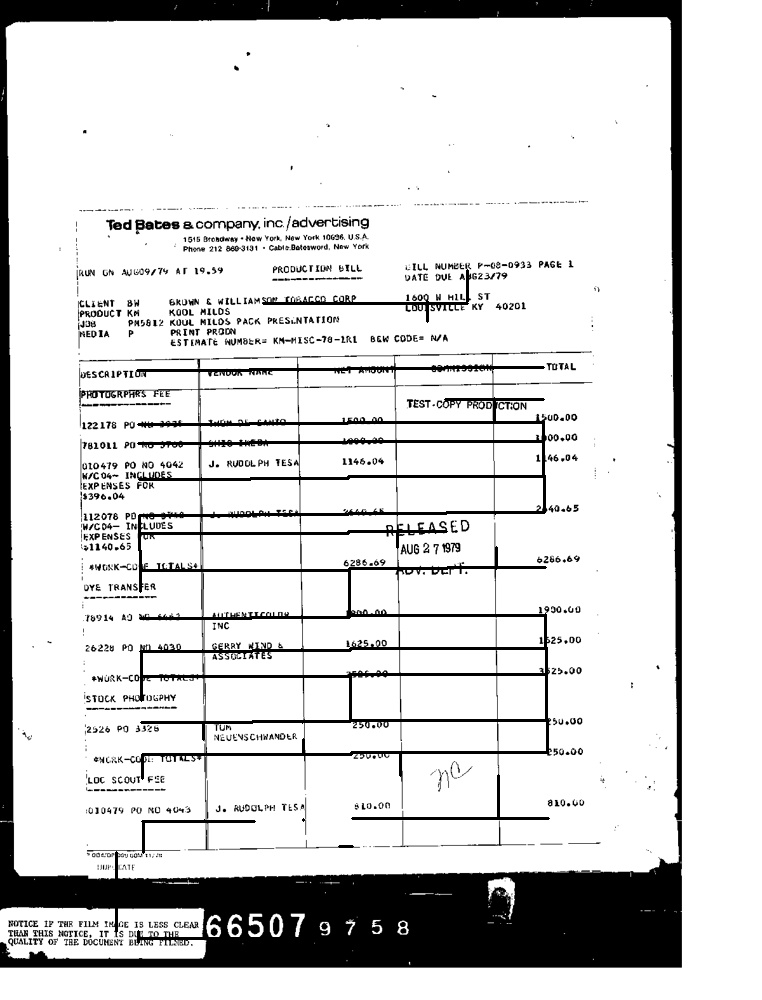

In [8]:
from IPython.display import Image
Image(filename='grapher_outputs/plots/object_tree_11002591.jpg')

In [6]:
!ls grapher_outputs/plots/

object_tree_0000223278.jpg	       object_tree_2080731237.jpg
object_tree_0001136521.jpg	       object_tree_2080978792_8793.jpg
object_tree_0001139626.jpg	       object_tree_2083197453.jpg
object_tree_0001139716.jpg	       object_tree_2083197818_7819.jpg
object_tree_0001144288.jpg	       object_tree_2083674163_4166.jpg
object_tree_0001431487.jpg	       object_tree_2084020274_0276.jpg
object_tree_00043445_00043449.jpg      object_tree_2084020376.jpg
object_tree_0011500947.jpg	       object_tree_2084021796.jpg
object_tree_0011899826.jpg	       object_tree_2084021799.jpg
object_tree_0013040651.jpg	       object_tree_2084021870.jpg
object_tree_0013043193.jpg	       object_tree_2084022002.jpg
object_tree_0013046347.jpg	       object_tree_2084022076.jpg
object_tree_0013404965.jpg	       object_tree_2084022124.jpg
object_tree_00555341.jpg	       object_tree_2084022128.jpg
object_tree_0060026250.jpg	       object_tree_2084022136.jpg
object_tree_0060026253.jpg	       object_tree_2084022139.jpg
o

### Features

#### Node features

- Coordinates of the bounding box (xmin, ymin, xmax, ymax)
- Text features. In the paper, only how many letters, numeric characters and special characters. More elaborate text features could be added here. But they argue that it can preserve anonymity

$\longrightarrow$ 7 node features

#### Edge features

The authors of the paper don't use any edges feature beside the fact that an edge exists between two nodes.

However, in this [implementation](https://github.com/dhavalpotdar/Graph-Convolution-on-Structured-Documents) dhavalpotdar adds edge features on the nodes themselves.



In [17]:
import pandas as pd
import numpy as np
doc_id = "11002591"
X = np.load(f"grapher_outputs/numpy/{doc_id}_X.npy")
df = pd.DataFrame(X, columns=["xmin", "ymin", "xmax", "ymax", "nletters", "ndigits", "nothers"])
print(f"Original features for the first 5 nodes of document {doc_id}:")
df.head()

Original features for the first 5 nodes of document 11002591:


,xmin,ymin,xmax,ymax,nletters,ndigits,nothers
0,55.0,28.0,113.0,36.0,3.0,1.0,3.0
1,87.0,63.0,106.0,69.0,1.0,0.0,1.0
2,581.0,51.0,656.0,81.0,10.0,5.0,2.0
3,54.0,104.0,104.0,112.0,6.0,0.0,0.0
4,132.0,113.0,373.0,125.0,28.0,0.0,0.0


In [19]:
import pandas as pd
doc_id = "11002591"
df = pd.read_csv(f"grapher_outputs/connections/connections_{doc_id}.csv")
print(f"Edge features encoded on the node, for the first 5 nodes of document {doc_id}:")
print(f"Note: <label> is the true label, it's note a feature")
df.head()

Edge features encoded on the node, for the first 5 nodes of document 11002591:
Note: <label> is the true label, it's note a feature


,xmin,ymin,xmax,ymax,Object,label,below_object,below_dist,below_obj_index,side_object,side_length,side_obj_index,revised_distances_vert,revised_distances_hori
0,55.0,28.0,113.0,36.0,8** ICO^,other,f *,34.0,1,NaN,0.0,-1,34.0,0.0
1,87.0,63.0,106.0,69.0,f *,other,SOLO TO,42.0,3,INVOICE NO. B-07025,522.0,2,42.0,522.0
2,581.0,51.0,656.0,81.0,INVOICE NO. B-07025,invoice_info,crcoiV do6c 033B,48.0,7,NaN,0.0,-1,48.0,0.0
3,54.0,104.0,104.0,112.0,SOLO TO,other,XEBXiss : rr 633 Th...,33.5,8,DATE,417.0,5,-1.0,417.0
4,132.0,113.0,373.0,125.0,The Council for Tobacco ...,receiver,XEBXiss : rr 633 Th...,22.5,8,7-13-67,266.5,6,22.5,266.5


## Graph encoding: the adjacency matrix $A$

To encode the graph, an adjacency matrix $A$ is used. $A$ is a squared matrix, where the number of rows is equal to the number of nodes in the graph.

$a_{i, j} = 1$  if there is an edge between node $i$ and $j$

$a_{i, j} = 0$ else

In [21]:
import pandas as pd
import numpy as np
doc_id = "11002591"
A = np.load(f"grapher_outputs/numpy/{doc_id}_A.npy")
A.shape
df = pd.DataFrame(A, columns=range(50))
# print(f"Original features for the first 5 nodes of document {doc_id}:")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


One interesting point in this representation is that if you want to get all the nodes at two hops of one, you just have to compute $A^2$

In [26]:
np.matmul(A, A)

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

And thus all nodes reachable with less than $n$ hopes are:
$$\sum_{j=0}^n A^j$$

$A^0$ stands for the identity matrix. Adding $I$ to $A$ is equivalent to adding self loops on each node.

In [42]:
# I + A + A^2 + A^3
np.eye(A.shape[0]) + A + np.matmul(A, A) + np.matmul(np.matmul(A, A), A) 

array([[2., 3., 1., ..., 0., 0., 0.],
       [3., 3., 4., ..., 0., 0., 0.],
       [1., 4., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Digression on Graph representations and GNN

The idea behind graph neural networks (not specifically this paper) is to propagate node information to the graph. 

The goal is to use neighbooring information (features) to predict the current node label.

To do so, one would just have to do a matrix product between A and X

In [43]:
np.matmul(A, X).shape

(50, 7)

### Graph Convolutional Network (GCN)

To compute the output of a Graph Convolutional Layer, we still have to multiply by some weight parameter, $W$

if $\sigma$ is a non linear activation function,

$$f(X, A) = \sigma(A X W) $$

Where $W$ is a matrix of shape: nfeatures $\times$ noutputs

Let $X^{(k)}$ be the feature matrix at layer k

$$X^{(k+1)} =\sigma(A X^{(k)} W) $$


Let $\hat{A}$ be the adjacency matrix (may have been transformed to add self loop, 2-hops...), 


$$X^{(k+1)} =\sigma(\hat{A} X^{(k)} W) $$


#### Using the degree to normalize

Note: Kipf et al proposed to divide by the degree in order to avoid giving to much weight to nodes with a high degree (https://arxiv.org/abs/1609.02907, https://tkipf.github.io/graph-convolutional-networks/)

$\hat{A} = A + I$

$\hat{D}$ diagonal degree matrix of $\hat{A}$


$\hat{D}^{-1/2}\hat{A}\hat{D}^{-1/2}$

## Riba et al approach

### GNN Layer
Let's come back on Riba's paper: Table Detection in Invoice Documents by Graph Neural Networks

Authors point that in the usual framework, the network doesn't learn the graph, the adjacency matrix is given and doesn't change from one layer to the other.

They propose to learn the node label and the node connections at the same time

$$x^{(k+1)}= G_C(x^{(k)}) = \sigma(\sum_{B\in \mathcal{A}^{(k)}} B x^{(k)} \theta_B^{(k)})$$


Where $\mathcal{A}^{(k)}$ is the set of adjacency matrices (j=0 to n) at layer $k$.


If it wasn't changing between layers, we would have:

$$x^{(k+1)} = \sigma(x^{(k)} + A x^{(k)} \theta_A^{(k)} + A^2 \theta_{A^2}^{(k)}+ \dots + A^n \theta_{A^n}^{(k)} )$$

If $n=2$ (maximum 2-hop neighborhood are used):


$$x^{(k+1)} = \sigma(x^{(k)} + A x^{(k)} \theta_A^{(k)} + A^2 \theta_{A^2}^{(k)})$$


### Graph adjacency layer

$\mathcal{A}^{(k)} = \{ \phi_k(A^j)\}$

Where, for $B$ in $\{I, A, A^2...\}$,

$\phi_k(B)_{i, j} = 0$ if B_{i, j} =0 (no connection)

$\phi_k(B)_{i, j} = \sigma(\textrm{MLP}_{\theta}(|x_i^{(k)} - x_i^{(k)} |)$ otherwise (there is a connection)

![image.png](img/Grap_adjacency_layer_eq.png)


MLP: Multi-Layer perceptron

The absolute difference => symetrc


#### Looks challenging

There are a lot of parameters here. 

Authors don't give any insight about how many layers this MLP should have. 

In [48]:
# If we have 50 nodes (seems relevant for one page according to the data)
nnodes = 50
# the number of output has to be the number of nodes to be considered as an adjacency matric
noutputs = nnodes
# Let's say we have only 2 layers
layer1 = nnodes*(nnodes+1)
layer2 = nnodes*(nnodes+1)

#let's assume, we considere the graph upto 2-hop neighbboors
print("The number of parameter for one Graph adjacency layer with 50 nodes distance 2 and 2 layers would be:")
(layer1 + layer2) * 3

The number of parameter for one Graph adjacency layer with 50 nodes distance 2 and 2 layers would be:


15300

### Final classifier

Two classifiers:
1. Node classifier, multiclass, softmax
2. Edge classifier, whether or not two nodes are in the same region

The objective function can be just the cross entropy on the node classifier. But authors propose to give a second objective about the edge classification.


In [60]:
LABEL_ID = {'other':0,
            'invoice_info':1,
            'positions':2,
            'receiver':3,
            'supplier':4,
            'total':5}
LABELS = ['other',
            'invoice_info',
            'positions',
            'receiver',
            'supplier',
            'total']
import pandas as pd
import numpy as np
doc_id = "11002591"
Y = np.load(f"grapher_outputs/numpy/{doc_id}_Y.npy")
print(f"true labels for the first 5 nodes of document {doc_id}:")
[LABELS[int(lid)] for lid in Y[:5]]

true labels for the first 5 nodes of document 11002591:


['other', 'other', 'invoice_info', 'other', 'receiver']

### Edge threshold

With the edge detection, it is possible to say whether two nodes classified as tables are in the **same** table or not. A threshold on the edge output is applied here.

The ground truth is: 1 if the nodes are of the same region, 0 otherwise.

### Node threshold 

A threshold is also applied on the node class output to detect a table or not

## Experiments and results



![table 1](img/table1.png)
![table 2](img/table2.png)
![table 3](img/table3.png)
![table 4](img/table4.png)

In [64]:
!ls img

Grap_adjacency_layer_eq.png  table1.png  table2.png  table3.png  table4.png




### Graph neural networks
convolutional, because filter parameters are typically shared over all locations in the graph
https://tkipf.github.io/graph-convolutional-networks/

### GNN Architecture
...



## Experimental results (from the paper)


### Digression on Graph representations and GNN


Part 1:
https://towardsdatascience.com/how-to-do-deep-learning-on-graphs-with-graph-convolutional-networks-7d2250723780

Part 2:
https://towardsdatascience.com/how-to-do-deep-learning-on-graphs-with-graph-convolutional-networks-62acf5b143d0


### Keras Graph NN implementation
https://medium.com/@svenbalnojan/using-graph-cnns-in-keras-8b9f685c4ed0

https://github.com/vermaMachineLearning/keras-deep-graph-learning
https://vermamachinelearning.github.io/keras-deep-graph-learning/

# RVL-CDIP Dataset

See http://localhost:8889/notebooks/RVL-CDIP%20Dataset%20feature%20and%20adjacency%20extraction.ipynb

Can be downloaded here: 
https://zenodo.org/record/3257319

For each document, there are 3 files:
- An image .tif
- An XML file corresponding to the output of the OCR
- An XML file with the labels

### Exploiting data from this dataset

1. graph extraction
1. feature extraction
1. label extraction

### Entities

In [80]:
from pathlib import Path
from lxml import etree
namespaces = {None:"http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15"}
entities = []
for f in Path('../zenedo_dataset').glob('*_gt.xml'):
    root = etree.parse(open(f))
    entities.extend([e.get("value") for e in root.findall("//Property", namespaces=namespaces) if e.get("key")=="entity"])

In [81]:
len(entities), len(set(entities))

(4357, 6)

In [82]:
set(entities)

{'invoice_info', 'other', 'positions', 'receiver', 'supplier', 'total'}

### Label extraction

The bounding boxes of the OCR and of the ground truth don't necessarily correspond. I choose to label an ocr box if its intersection with the label object was greater than half of its surface

In [83]:
# from label_data.py
from label_data import *
def label_ocr(gt_file, ocr_file, threshold_area=0.5, default_label='other'):
    entities = load_entities(gt_file)
    ocr_data = load_ocr_file(ocr_file)
    result = []
    for node in ocr_data:
        xmin, ymin, xmax, ymax, text = node
        box = xmin, ymin, xmax, ymax
        box_area = compute_area(*box)
        node_entity = default_label
        for entity in entities:
            entity_box, entity_label = entity
            intersection_area = compute_intersection(box, entity_box)
            if intersection_area/box_area > threshold_area:
                node_entity = entity_label
                break
        result.append([xmin, ymin, xmax, ymax, text, node_entity])
    return result


In [84]:
label_ocr("../zenedo_dataset/11002591_gt.xml", "../zenedo_dataset/11002591_ocr.xml")

[[55.0, 28.0, 113.0, 36.0, '8**       ICO^', 'other'],
 [87.0, 63.0, 106.0, 69.0, 'f       *', 'other'],
 [581.0,
  51.0,
  656.0,
  81.0,
  'INVOICE       NO.          B-07025',
  'invoice_info'],
 [54.0, 104.0, 104.0, 112.0, 'SOLO       TO', 'other'],
 [132.0,
  113.0,
  373.0,
  125.0,
  'The       Council       for       Tobacco       Research',
  'receiver'],
 [481.0, 102.0, 511.0, 111.0, 'DATE', 'invoice_info'],
 [490.0, 111.0, 548.0, 126.0, '7-13-67', 'invoice_info'],
 [596.0,
  102.0,
  669.0,
  126.0,
  'crcoiV       do6c          033B',
  'invoice_info'],
 [56.0,
  126.0,
  477.0,
  157.0,
  'XEBXiss       :       rr          633       Third       Avenue',
  'receiver'],
 [477.0, 126.0, 751.0, 157.0, 'Net       30       Days', 'invoice_info'],
 [56.0,
  157.0,
  477.0,
  183.0,
  'New       York,       New       York       10017',
  'receiver'],
 [56.0,
  183.0,
  477.0,
  211.0,
  'Attention:       Dr.       R.       C.       Hockett',
  'other'],
 [477.0, 183.0, 751.0, 211.

In [67]:
print(doc_id)

11002591


In [68]:
!ls ../zenedo_dataset/11002591*

../zenedo_dataset/11002591_gt.xml   ../zenedo_dataset/11002591.tif
../zenedo_dataset/11002591_ocr.xml


In [70]:
less ../zenedo_dataset/11002591_ocr.xml

<?xml version="1.0" encoding="utf-8"?>
<PcGts xmlns="http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15">
  <Metadata>
    <Creator>ABBYY FineReader Engine 11 + alto2page.xslt 2018.11.09</Creator>
    <Created>2019-01-23T00:00:00</Created>
    <LastChange>2019-01-23T00:00:00</LastChange>
  </Metadata>
  <Page imageFilename="11002591.tif" imageHeight="1000" imageWidth="771">
    <TextRegion id="Page1_TopMargin">
      <Property key="Margin" value="Top"/>
      <Coords points="0,0 771,0 771,28 0,28"/>
    </TextRegion>
    <TextRegion id="Page1_LeftMargin">
      <Property key="Margin" value="Left"/>
      <Coords points="0,28 51,28 51,902 0,902"/>
    </TextRegion>
    <TextRegion id="Page1_RightMargin">
      <Property key="Margin" value="Right"/>
      <Coords points="751,28 771,28 771,902 751,902"/>
    </TextRegion>
    <TextRegion id="Page1_BottomMargin">
      <Property key="Margin" value="Bottom"/>
      <Coords points="0,902 771,902 771,1000 0,1000"/>
:zenedo_datase

[ocr](file:///home/ludovic/Corcentric/zenedo_dataset/11002591_ocr.xml)